In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eedi-mining-misconceptions-in-mathematics/sample_submission.csv
/kaggle/input/eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv
/kaggle/input/eedi-mining-misconceptions-in-mathematics/train.csv
/kaggle/input/eedi-mining-misconceptions-in-mathematics/test.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
!pip install fasteda

  Preparing metadata (setup.py) ... - done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4723 sha256=f546e86b71ad689da2837f4cea78cff4538cf248a7641a428177538cbd802da6
  Stored in directory: /root/.cache/pip/wheels/ed/08/72/0d0ec0d3927d227b38ce9542ec3fa6b975c2e17ad0d046dcee
Successfully built fasteda


In [4]:
train = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/train.csv")
test = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/test.csv")
mis_map = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv")
sub = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/sample_submission.csv")

In [5]:
misTable = dict(zip(mis_map.MisconceptionId, mis_map.MisconceptionName))

In [6]:
train.head()

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0
1,1,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify,2142.0,143.0,2142.0,NaN
2,2,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct,1287.0,NaN,1287.0,1073.0
3,3,2377,Recall and use the intersecting diagonals prop...,88,Properties of Quadrilaterals,C,The angles highlighted on this rectangle with ...,acute,obtuse,\( 90^{\circ} \),Not enough information,1180.0,1180.0,NaN,1180.0
4,4,3387,Substitute positive integer values into formul...,67,Substitution into Formula,A,The equation \( f=3 r^{2}+3 \) is used to find...,\( 30 \),\( 27 \),\( 51 \),\( 24 \),NaN,NaN,NaN,1818.0


In [7]:
train.tail()

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
1864,1864,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,C,What is the range of the following numbers?\n\...,\( 5 \),\( 11 \),\( 23 \),\( 16 \),2456.0,691.0,NaN,1349.0
1865,1865,2695,"Describe an enlargement, with no centre of enl...",90,Length Scale Factors in Similar Shapes,B,Shape \( Q \) is an enlargement of shape \( P ...,\( 3 \div 11 \),\( 11 \div 3 \),\( 3 \times 11 \),\( 11-3 \),1500.0,NaN,2442.0,1258.0
1866,1866,854,Use the order of operations to carry out calcu...,33,BIDMAS,B,What does the following equal?\n\[\n8-7+10 \ti...,\( 36 \),\( 31 \),\( -29 \),\( 33 \),NaN,NaN,2306.0,1507.0
1867,1867,2634,Distinguish between congruency and similarity,274,Congruency in Other Shapes,B,Tom and Katie are discussing congruence and si...,Only\nTom,Only Katie,Both Tom and Katie,Neither is correct,2312.0,NaN,2312.0,2312.0
1868,1868,2680,Describe a 90° or 270° rotation giving the ang...,93,Rotation,B,Jo and Paul are arguing about how to fully des...,Only\nJo,Only Paul,Both Jo and Paul,Neither is correct,801.0,NaN,801.0,95.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QuestionId        1869 non-null   int64  
 1   ConstructId       1869 non-null   int64  
 2   ConstructName     1869 non-null   object 
 3   SubjectId         1869 non-null   int64  
 4   SubjectName       1869 non-null   object 
 5   CorrectAnswer     1869 non-null   object 
 6   QuestionText      1869 non-null   object 
 7   AnswerAText       1869 non-null   object 
 8   AnswerBText       1869 non-null   object 
 9   AnswerCText       1869 non-null   object 
 10  AnswerDText       1869 non-null   object 
 11  MisconceptionAId  1135 non-null   float64
 12  MisconceptionBId  1118 non-null   float64
 13  MisconceptionCId  1080 non-null   float64
 14  MisconceptionDId  1037 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 219.1+ KB


In [9]:
train.describe()

,QuestionId,ConstructId,SubjectId,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
count,1869.000000,1869.000000,1869.000000,1135.000000,1118.000000,1080.000000,1037.000000
mean,934.000000,1613.261637,225.370787,1308.599119,1308.029517,1285.300926,1264.568949
std,539.678145,1060.591804,238.536233,744.518370,766.487351,742.212198,759.818341
min,0.000000,4.000000,33.000000,1.000000,1.000000,2.000000,0.000000
25%,467.000000,575.000000,92.000000,686.000000,628.500000,652.250000,578.000000
50%,934.000000,1470.000000,203.000000,1336.000000,1379.000000,1294.500000,1282.000000
75%,1401.000000,2637.000000,238.000000,1954.000000,1970.000000,1912.000000,1897.000000
max,1868.000000,3526.000000,1984.000000,2585.000000,2586.000000,2585.000000,2583.000000


In [10]:
train.columns

Index(['QuestionId', 'ConstructId', 'ConstructName', 'SubjectId',
       'SubjectName', 'CorrectAnswer', 'QuestionText', 'AnswerAText',
       'AnswerBText', 'AnswerCText', 'AnswerDText', 'MisconceptionAId',
       'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId'],
      dtype='object')

In [11]:
!pip install -qq pylatexenc

In [12]:
import pandas as pd
from IPython.display import display, HTML
from pylatexenc.latex2text import LatexNodes2Text

# Map misconception ID to its respective description, handling NaN values
def map_misconception_id(value, misTable):
    if pd.isna(value):
        return "No misconception/NaN"
    return misTable.get(int(value), "Unknown Misconception")

# Generate an HTML block for displaying a question with its options and misconceptions
def generate_question_html(df, index, misTable, lat2text=True):
    # Fetch the question and options from the DataFrame
    question = df.iloc[index].QuestionText
    if lat2text:
        question = LatexNodes2Text().latex_to_text(question)

    options = [df[f'Answer{i}Text'].iloc[index] for i in ['A', 'B', 'C', 'D']]

    # Fetch the correct answer and additional fields
    correct_answer = df.iloc[index].CorrectAnswer
    construct_name = df.iloc[index].ConstructName
    subject_name = df.iloc[index].SubjectName

    # Map the misconception IDs using the provided misTable
    misconception_ids = {
        'A': map_misconception_id(df.iloc[index].MisconceptionAId, misTable),
        'B': map_misconception_id(df.iloc[index].MisconceptionBId, misTable),
        'C': map_misconception_id(df.iloc[index].MisconceptionCId, misTable),
        'D': map_misconception_id(df.iloc[index].MisconceptionDId, misTable)
    }

    # Start the HTML structure with a styled container
    html = f"""
    <div style="font-family: Arial, sans-serif; border: 2px solid #007bff; padding: 15px; border-radius: 10px; width: 60%; margin: 0 auto; background-color: #f4f9ff;">
        <p style="font-size: 16px; color: #007bff;"><strong>Construct Name:</strong> {construct_name}</p>
        <p style="font-size: 16px; color: #007bff;"><strong>Subject Name:</strong> {subject_name}</p>
        <hr style="border: 1px solid #007bff; margin: 10px 0;">
        <p style="font-size: 18px; font-weight: bold; color: #ff6f61;">Problem:</p>
        <p style="font-size: 20px; color: #333; font-weight: bold;">{question}</p>
        <ul style="list-style-type: none; padding: 0;">
    """

    # Option letters and corresponding options
    for i, option in enumerate(options):
        option_letter = ['A', 'B', 'C', 'D'][i]
        html += f"""
        <li style="background-color: #e0f2ff; padding: 10px; margin: 5px 0; border-radius: 5px;">
            <span style="font-weight: bold; color: #007bff;">{option_letter}.</span> {option}
        </li>
        """

    # Close the list and add the correct answer
    html += f"""
        </ul>
        <p style="font-size: 18px; font-weight: bold; color: #28a745;">Correct answer: {correct_answer}</p>
        <hr style="border: 1px solid #007bff; margin: 20px 0;">
        <p style="font-size: 16px; color: #333;"><strong>Misconception A:</strong> {misconception_ids['A']}</p>
        <p style="font-size: 16px; color: #333;"><strong>Misconception B:</strong> {misconception_ids['B']}</p>
        <p style="font-size: 16px; color: #333;"><strong>Misconception C:</strong> {misconception_ids['C']}</p>
        <p style="font-size: 16px; color: #333;"><strong>Misconception D:</strong> {misconception_ids['D']}</p>
    </div>
    """

    # Display the HTML content
    display(HTML(html))

# Example Usage:
# Assuming df is a DataFrame and misTable is a dictionary mapping misconception IDs to their descriptions
# generate_question_html(df, index=0, misTable=misTable, lat2text=True)


In [13]:
# Assuming train is a pandas DataFrame and misTable is a dictionary that maps misconception IDs
index = 1
generate_question_html(train, index, misTable=misTable, lat2text=0)


In [14]:
index = 2
generate_question_html(train, index, misTable=misTable, lat2text=1)

In [15]:
index = 3
generate_question_html(train, index, misTable=misTable, lat2text=1)

In [16]:
index = 4
generate_question_html(train, index, misTable=misTable, lat2text=1)

In [17]:
index = 5
generate_question_html(train, index, misTable=misTable, lat2text=1)

In [18]:
index = 6
generate_question_html(train, index, misTable=misTable, lat2text=1)

In [19]:
index = 7
generate_question_html(train, index, misTable=misTable, lat2text=1)


In [20]:
index = 8
generate_question_html(train, index, misTable=misTable, lat2text=1)

In [21]:
test.head()

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText
0,1869,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets
1,1870,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify
2,1871,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct


In [22]:
sub.head()

,QuestionId_Answer,MisconceptionId
0,1869_B,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,1869_C,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
2,1869_D,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
3,1870_A,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
4,1870_B,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...


In [23]:
test.tail()

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText
0,1869,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets
1,1870,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify
2,1871,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   QuestionId     3 non-null      int64 
 1   ConstructId    3 non-null      int64 
 2   ConstructName  3 non-null      object
 3   SubjectId      3 non-null      int64 
 4   SubjectName    3 non-null      object
 5   CorrectAnswer  3 non-null      object
 6   QuestionText   3 non-null      object
 7   AnswerAText    3 non-null      object
 8   AnswerBText    3 non-null      object
 9   AnswerCText    3 non-null      object
 10  AnswerDText    3 non-null      object
dtypes: int64(3), object(8)
memory usage: 392.0+ bytes


### EDA

In [25]:
train.columns

Index(['QuestionId', 'ConstructId', 'ConstructName', 'SubjectId',
       'SubjectName', 'CorrectAnswer', 'QuestionText', 'AnswerAText',
       'AnswerBText', 'AnswerCText', 'AnswerDText', 'MisconceptionAId',
       'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId'],
      dtype='object')

In [26]:
import pandas as pd
from IPython.display import display

def display_colorful_null_values_table(df):
    # Calculate the number of null values per column
    null_values = df.isna().sum().reset_index()
    null_values.columns = ['Column', 'Null Values']  # Rename columns

    # Define a function to apply different colors based on null values
    def highlight_nan(val):
        if val > 0:
            return 'background-color: lightcoral'  # Red for columns with nulls
        else:
            return 'background-color: lightgreen'  # Green for columns without nulls

    # Apply styling for the entire table with a new color scheme
    styled_table = null_values.style.set_properties(**{
        'background-color': '#f0f8ff',  # Light azure background for the table
        'color': '#333',  # Dark text for readability
        'border-color': '#0044cc',  # Dark blue border color
        'border-width': '1px',
        'border-style': 'solid',
        'text-align': 'center',
        'padding': '8px',  # Padding for cell spacing
        'font-weight': 'bold',  # Bold text for better readability
    }).set_table_styles([
        # Custom styling for the table header
        {'selector': 'thead th', 'props': [
            ('background-color', '#0044cc'),  # Dark blue for header
            ('color', 'white'),  # White text for contrast
            ('border-color', '#0044cc'),
            ('border-width', '1px'),
            ('border-style', 'solid'),
            ('font-size', '14px'),  # Header text size
        ]}
    ]).map(highlight_nan, subset=['Null Values'])  # Use Styler.map instead of applymap

    # Display the colorful table
    display(styled_table)

# Display the colorful null values table for the 'train' DataFrame
display_colorful_null_values_table(train)


,Column,Null Values
0,QuestionId,0
1,ConstructId,0
2,ConstructName,0
3,SubjectId,0
4,SubjectName,0
5,CorrectAnswer,0
6,QuestionText,0
7,AnswerAText,0
8,AnswerBText,0
9,AnswerCText,0


In [27]:
train['ConstructId'].value_counts()[:10]

ConstructId
473     14
1470    13
1428    13
854     12
3346    12
1403    11
2774    11
1042     9
471      9
1493     9
Name: count, dtype: int64

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_value_counts(df, column_name):
    # Get the value counts for the specified column
    value_counts = df[column_name].value_counts()

    # Create a bar plot with a gradient color scheme
    plt.figure(figsize=(10, 6))
    bars = plt.bar(value_counts.index, value_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(value_counts))))

    # Add title and labels with custom fonts and styles
    plt.title(f'Value Counts for {column_name}', fontsize=18, fontweight='bold', family='serif', color='#4a4a4a')
    plt.xlabel('Values', fontsize=14, fontweight='bold', family='serif', color='#333')
    plt.ylabel('Count', fontsize=14, fontweight='bold', family='serif', color='#333')

    # Annotate the bars with the count values
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2,  # Position the text slightly above the bars
                 f'{int(height)}', ha='center', va='bottom', fontsize=12, color='#333')

    # Add a grid with light color and horizontal lines
    plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()



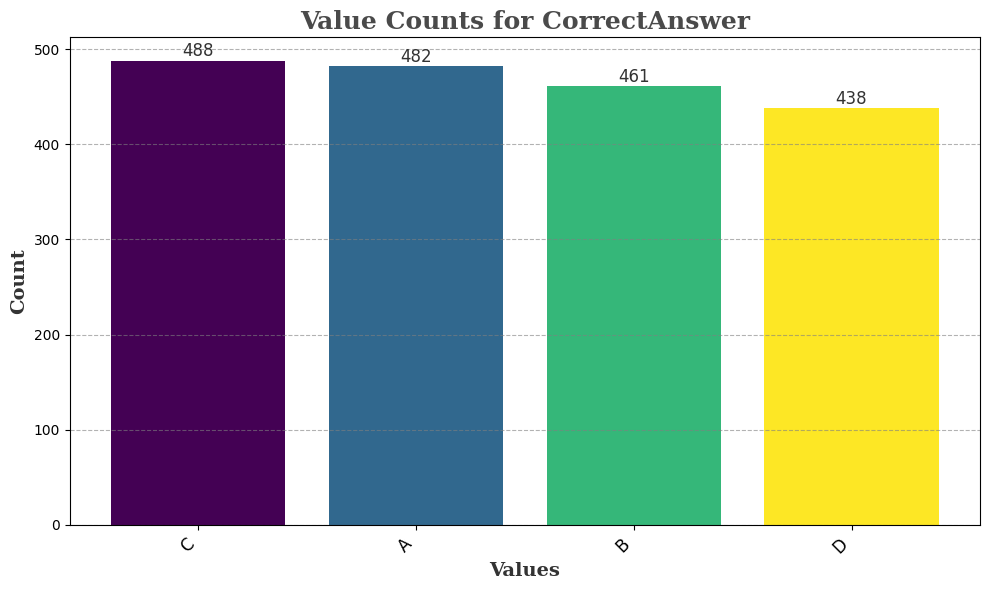

In [29]:
plot_value_counts(train, 'CorrectAnswer')

In [30]:
train['MisconceptionAId'].value_counts()

MisconceptionAId
1214.0    18
1880.0    12
1379.0    11
1507.0    10
1990.0    10
          ..
1731.0     1
1788.0     1
1818.0     1
379.0      1
801.0      1
Name: count, Length: 740, dtype: int64

In [31]:
train['MisconceptionBId'].value_counts()

MisconceptionBId
2316.0    17
1379.0    11
1507.0    11
1072.0    10
1880.0    10
          ..
2241.0     1
2279.0     1
709.0      1
2346.0     1
691.0      1
Name: count, Length: 727, dtype: int64

In [32]:
train['MisconceptionCId'].value_counts()

MisconceptionCId
1379.0    13
2316.0    12
1214.0    12
1507.0    10
77.0       7
          ..
2361.0     1
2043.0     1
2208.0     1
1024.0     1
801.0      1
Name: count, Length: 695, dtype: int64

In [33]:
train['MisconceptionDId'].value_counts()

MisconceptionDId
1214.0    14
1379.0     8
113.0      8
1880.0     8
2392.0     7
          ..
931.0      1
1181.0     1
376.0      1
1012.0     1
95.0       1
Name: count, Length: 673, dtype: int64

In [34]:
from collections import Counter

# Collect all non-null MisconceptionIds across the columns
stacked = []
for i in ['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']:
    stacked.extend(train[train[i].notna()][i].tolist())

# Function to sort misconceptions by frequency
def sort_by_frequency_with_counts(input_list):
    freq_count = Counter(input_list)
    sorted_elements_with_counts = sorted(freq_count.items(), key=lambda x: (-x[1], x[0]))  # Sort by frequency and then by MisconceptionId

    return sorted_elements_with_counts

# Get the sorted misconceptions
sorted_elements_with_counts = sort_by_frequency_with_counts(stacked)

# Display the most frequent MisconceptionIds
print("\n" + "="*100)
print("Most Frequent MisconceptionIds Across the Options")
print("="*100, "\n")

# Display the top 10 misconceptions with count
for i, (element, count) in enumerate(sorted_elements_with_counts[:10]):
    misconception = misTable.get(int(element), "Unknown Misconception")
    print(f"Rank {i+1}:")
    print(f"  Misconception: {misconception}")
    print(f"  MisconceptionId: {int(element)}")
    print(f"  MisconceptionId Count: {count}")
    print("-"*100, "\n")


Most Frequent MisconceptionIds Across the Options

Rank 1:
  Misconception: When solving an equation, uses the same operation rather than the inverse.
  MisconceptionId: 1214
  MisconceptionId Count: 54
---------------------------------------------------------------------------------------------------- 

Rank 2:
  Misconception: Rounds down instead of up
  MisconceptionId: 1379
  MisconceptionId Count: 43
---------------------------------------------------------------------------------------------------- 

Rank 3:
  Misconception: Mixes up squaring and multiplying by 2 or doubling
  MisconceptionId: 2316
  MisconceptionId Count: 38
---------------------------------------------------------------------------------------------------- 

Rank 4:
  Misconception: Carries out operations from left to right regardless of priority order
  MisconceptionId: 1507
  MisconceptionId Count: 36
---------------------------------------------------------------------------------------------------- 

Rank 

## Submission

In [35]:
# given guess data frame and ground truth array
def evaluate_map(guessed_df, ground_truth):
    guesses = guessed_df["MisconceptionId"].str.split()

    total = 0

    for guess_list, gt in zip(guesses, ground_truth):
        score = 0
        for i, guess in enumerate(guess_list):
            # find the first index where the guess is correct and break
            if guess == gt:
                score = 1 / (i + 1)
                break
        total += score

    # take the average over all observations
    return total / len(guesses)

In [36]:
import numpy as np
import pandas as pd

def evaluate_map(guessed_df, ground_truth, k=25):
    """
    Evaluates the Mean Average Precision at k (MAP@k) for the given guesses and ground truth.
    
    Parameters:
    - guessed_df: A DataFrame containing 'QuestionId_Answer' and 'MisconceptionId' columns.
    - ground_truth: A list of ground truth MisconceptionIds.
    - k: The cutoff for the top-k relevant items (default is 25).
    
    Returns:
    - MAP@k score
    """
    def average_precision_at_k(predictions, truth, k):
        # Ensure the predictions are sorted by their rank
        predictions = predictions[:k]
        truth_set = set(truth.split())  # Convert ground truth to a set for fast lookup
        
        # Compute precision for each relevant item in the top k predictions
        relevant_items = 0
        precision_sum = 0.0
        for i, prediction in enumerate(predictions):
            if prediction in truth_set:
                relevant_items += 1
                precision_sum += relevant_items / (i + 1)
        
        # Return the average precision at k
        return precision_sum / min(len(truth_set), k) if relevant_items > 0 else 0.0

    # Calculate the MAP@k score by averaging over all rows in the guessed dataframe
    ap_scores = []
    for idx, row in guessed_df.iterrows():
        question_answer = row['QuestionId_Answer']
        predicted_misconceptions = row['MisconceptionId'].split()  # Split misconceptions into a list
        truth_misconception = ground_truth[idx]  # Get the ground truth for this index
        
        ap_score = average_precision_at_k(predicted_misconceptions, truth_misconception, k)
        ap_scores.append(ap_score)
    
    # Return the mean of all average precision scores
    return np.mean(ap_scores)

# Toy DataFrame and ground truth
guessed_df = pd.DataFrame({
    "QuestionId_Answer": ["1_A", "1_B", "1_C", "2_A", "2_B"],
    "MisconceptionId": ["1 2 3", "4 5 6", "7 8 9", "1 4 7", "2 5 8"]
})

# Ground truth values
ground_truth = ["1", "6", "10", "7", "5"]

# Evaluate MAP@25 score
map_score = evaluate_map(guessed_df, ground_truth)
print("MAP@25 Score:", map_score)


MAP@25 Score: 0.4333333333333333
